# Описание проекта

- Оператор мобильной связи выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
- В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Необходимо построить модель для задачи классификации, которая выберет подходящий тариф.
- Необходимо построить модель с максимально большим значением accuracy. Доля правильных ответов должна составлять по крайней мере 0.75

## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

# Выполнение проекта

## Общая информация

Импортируем нужные библиотеки


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



Загрузим данные

In [3]:
try:
    df=pd.read_csv('C:/Users/kaz-106/YandexDisk/Py-projects/02_Practicum projects/05_Machine_learning_introduction/users_behavior.csv')
except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

## Общий вид данных

Изучим общий вид данных

In [4]:
display(df.info())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


## Разделение данных на выборки

Разделим данные на обучающую, валидационную и тестовую выборки. В данном случае у нас нет отдельной тестовой выборки, значит, данные нужно разбить на три части: обучающую, валидационную и тестовую.
Размеры тестового и валидационного наборов обычно равны. Разобьем исходные данные в соотношении 60:20:20. Используем метод train_test_split дважды. Данный метод по умолчанию перемешивает данные, так что не нужно беспокоиться о стратификации

In [5]:
df_train, df_valid = train_test_split(df, test_size=0.2,train_size=0.8,random_state=123)
df_train, df_test = train_test_split(df_train, test_size=0.25,train_size=0.75,random_state=123)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(1928, 5)
(643, 5)
(643, 5)


## Выделение признаков и целевых признаков

In [6]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

## Исследуем качесто разных моделей

- Будем применять к данным разные модели, варьировать гиперпараметры и исследовать качество моделей
- В данном проекте решается задача классификации, будем пробовать следующие модели:

    1. Решаюшее дерево
    2. Случайный лес
    3. Логистическая регрессия

### Решающее дерево

У алгоритма решающего дерева есть следующие гиперпараметры:
- max_depth — максимальная глубина дерева;
- criterion — критерий разделения;
- min_samples_split — минимальное число объектов в узле дерева, достаточное для дальнейшего разделения;
- min_samples_leaf — минимальное число объектов в листьях дерева — нижних узлах с ответами

В данном проекте исcледуем модель решающего дерева с различной глубиной деревьев. Построим график зависимости качества модели от глубины дерева - видно, что глубина более 10 не имеет смысла

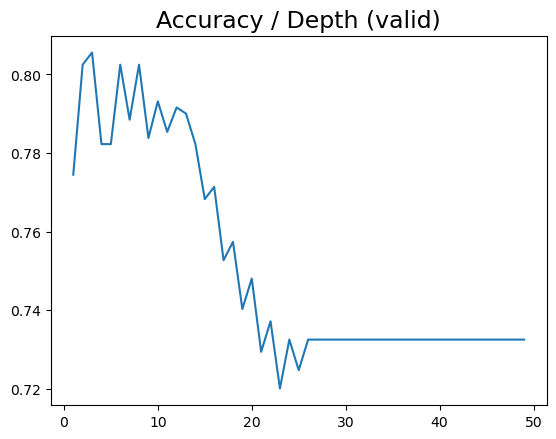

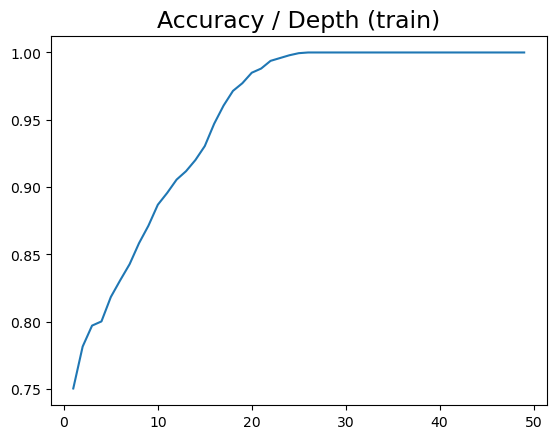


Accuracy наилучшей модели на валидационной выборке: 0.8055987558320373

Wall time: 682 ms


In [7]:
%%time

best_model_1 = None
best_result_1 = 0

x_axis_1=[]
y_axis_1=[]

x_axis_1t=[]
y_axis_1t=[]

for depth in range(1,50):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучим модель с заданной глубиной дерева
    model_1.fit(features_train,target_train) # обучим модель на тренировочной выборке
    
    predictions_train=model_1.predict(features_train)
    
    y_axis_1t.append(accuracy_score(target_train, predictions_train))
    x_axis_1t.append(depth)
    
    
    result_1 = model_1.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке
    
    predictions_valid = model_1.predict(features_valid)
    #print("max_depth =", depth, ": ", end='')
    #print(accuracy_score(target_valid, predictions_valid))
    y_axis_1.append(accuracy_score(target_valid, predictions_valid))
    x_axis_1.append(depth)
    
    if result_1 > best_result_1:
        best_model_1 = model_1 #сохраним наилучшую модель
        best_result_1 = result_1  #сохраним наилучшее значение метрики accuracy на валидационных данных
       
plt.plot(x_axis_1,y_axis_1)
plt.title('Accuracy / Depth (valid)', fontsize=17)
plt.show()

plt.plot(x_axis_1t,y_axis_1t)
plt.title('Accuracy / Depth (train)', fontsize=17)
plt.show()
        
print('')
print("Accuracy наилучшей модели на валидационной выборке:", best_result_1)
print('')

### Случайный лес

Иследуем модель случайного леса с различным количеством деревьев 

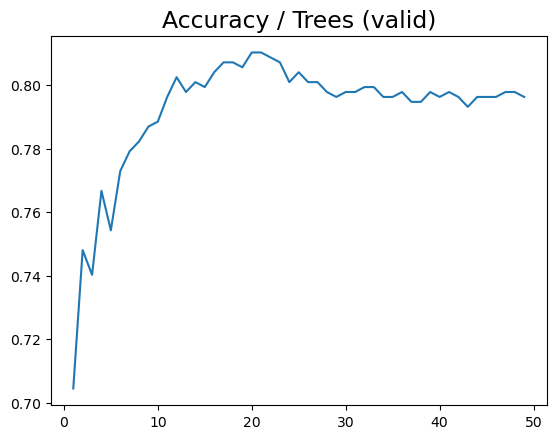

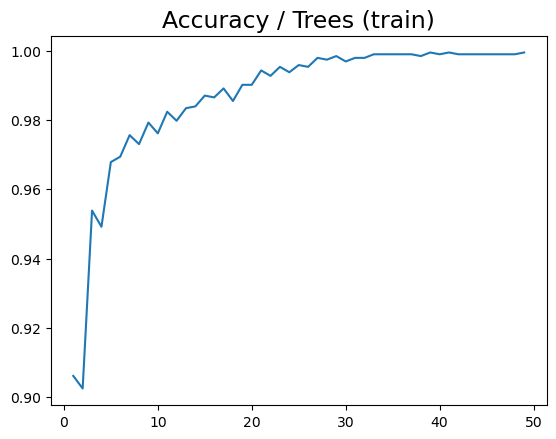


Accuracy наилучшей модели на валидационной выборке: 0.8102643856920684

Wall time: 4.65 s


In [8]:
%%time

best_model_2 = None
best_result_2 = 0

x_axis_2=[]
y_axis_2=[]

x_axis_2t=[]
y_axis_2t=[]

for est in range(1, 50):
    model_2 = RandomForestClassifier(random_state=12345, n_estimators=est) # обучим модель с заданным количеством деревьев
    model_2.fit(features_train,target_train) # обучим модель на тренировочной выборке
    result_2 = model_2.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке
    predictions_valid = model_2.predict(features_valid)
    
    predictions_train=model_2.predict(features_train)
    
    y_axis_2t.append(accuracy_score(target_train, predictions_train))
    x_axis_2t.append(est)
    
    
    y_axis_2.append(accuracy_score(target_valid, predictions_valid))
    x_axis_2.append(est)
    
    
    if result_2 > best_result_2:
        best_model_2 = model_2 #сохраним наилучшую модель
        best_result_2 = result_2  #сохраним наилучшее значение метрики accuracy на валидационных данных
        
plt.plot(x_axis_2,y_axis_2)
plt.title('Accuracy / Trees (valid)', fontsize=17)
plt.show()       

plt.plot(x_axis_2t,y_axis_2t)
plt.title('Accuracy / Trees (train)', fontsize=17)
plt.show()
        
        
print('')
print("Accuracy наилучшей модели на валидационной выборке:", best_result_2)
print('')


### Логистическия регрессия

Исследуем модель логистической регрессии

Гиперпараметры: 
- solver='lbfgs' - алгоритм, который будет строить модель, алгоритм 'lbfgs' — один из самых распространённых. Он подходит для большинства задач.
- max_iter=1000 - максимальное количество итераций обучения.


In [9]:
%%time

model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model_3.fit(features_train,target_train) 
result_3 = model_3.score(features_valid,target_valid)
print('')
print("Accuracy наилучшей модели на валидационной выборке:", result_3)
print('')



Accuracy наилучшей модели на валидационной выборке: 0.7511664074650077

Wall time: 130 ms


### Проверка качества модели на тестовой выборке

Наилучшую точность показала модель случайного леса. Отметим, что для нее затраты CPU time гораздо выше, чем для решающего дерева. Проверим ее на тестовой выборке

In [11]:
predictions_test=model_2.predict(features_test)
print('')
print("Accuracy наилучшей модели на тестовой выборке:",accuracy_score(target_test, predictions_test))


Accuracy наилучшей модели на тестовой выборке: 0.7853810264385692


### Выводы

- Была выполнено исследование качества различных моделей машинного обучения, применимых к задаче классификации: решающее дерево, случайный лес, логистическая регрессия
- Модели были оптимизированны на валидационных данных с использованием различных гиперпараметров
- Была произведена проверка точности лучшей модели на тестовых данных:
1. Лучшая модель - случайный лес (наивысшая точность, однако высокие затраты CPU time)
2. Точности модели на тестовых данных выше 0.75, что удовлетворяет требованиям данного проекта

   